# Setup

In [1]:
cd /home/ubuntu/fastai/deeplearning1/nbs/

/home/ubuntu/fastai/deeplearning1/nbs


In [2]:
import os, json, shutil
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
from utils import *
from vgg16 import Vgg16
import pandas as pd
import numpy as np

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
#import pandas as pd
#import numpy as np

In [4]:
cd /home/ubuntu/data/

/home/ubuntu/data


In [9]:
#Need to first go to Kaggle website and accept rules for the competition!
!kg download -u superexistential -p XXXXX -c state-farm-distracted-driver-detection

Starting new HTTPS connection (1): www.kaggle.com
downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/sample_submission.csv.zip

Starting new HTTPS connection (1): storage.googleapis.com
sample_submission.csv.zip 100% |#####################| Time: 0:00:01 151.6 KiB/s

downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/imgs.zip

imgs.zip 100% |######################################| Time: 0:02:19  29.3 MiB/s

downloading https://www.kaggle.com/c/state-farm-distracted-driver-detection/download/driver_imgs_list.csv.zip

Resetting dropped connection: www.kaggle.com
driver_imgs_list.csv.zip 100% |######################| Time: 0:00:00 339.7 KiB/s



In [10]:
!mkdir ./statefarm

In [11]:
!mv imgs.zip ./statefarm/
!mv driver_imgs_list.csv.zip ./statefarm/
!mv sample_submission.csv.zip ./statefarm/

In [5]:
path='/home/ubuntu/data/statefarm/'
%cd $path

/home/ubuntu/data/statefarm


In [14]:
!unzip -q imgs.zip
!unzip -q driver_imgs_list.csv.zip

In [15]:
!rm imgs.zip
!rm driver_imgs_list.csv.zip

In [16]:
!mkdir sample

In [17]:
!mkdir valid

In [18]:
os.mkdir(path+'sample/train')

In [19]:
os.mkdir(path+'sample/valid')

In [20]:
os.mkdir(path+'test/unknown')

In [21]:
for i in range(10): os.mkdir(path+'sample/train/c'+str(i))

In [22]:
for i in range(10): os.mkdir(path+'sample/valid/c'+str(i))

In [23]:
for i in range(10): os.mkdir(path+'valid/c'+str(i))

In [24]:
%cd $path/test


/home/ubuntu/data/statefarm/test


In [25]:
mv *.jpg ./unknown

In [27]:
for i in range(10):
    nupath=path+'train/c' + str(i)
    %cd $nupath
    g=glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(250):
        os.rename(shuf[j], path+'valid/c'+str(i)+'/'+shuf[j])
        #shutil.copy(shuf[j], path+'valid/c'+str(i))

/home/ubuntu/data/statefarm/train/c0
/home/ubuntu/data/statefarm/train/c1
/home/ubuntu/data/statefarm/train/c2
/home/ubuntu/data/statefarm/train/c3
/home/ubuntu/data/statefarm/train/c4
/home/ubuntu/data/statefarm/train/c5
/home/ubuntu/data/statefarm/train/c6
/home/ubuntu/data/statefarm/train/c7
/home/ubuntu/data/statefarm/train/c8
/home/ubuntu/data/statefarm/train/c9


In [28]:
for i in range(10):
    nupath=path+'train/c' + str(i)
    %cd $nupath
    g=glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(100):
        shutil.copy(shuf[j], path+'sample/train/c'+str(i)+'/'+shuf[j])

/home/ubuntu/data/statefarm/train/c0
/home/ubuntu/data/statefarm/train/c1
/home/ubuntu/data/statefarm/train/c2
/home/ubuntu/data/statefarm/train/c3
/home/ubuntu/data/statefarm/train/c4
/home/ubuntu/data/statefarm/train/c5
/home/ubuntu/data/statefarm/train/c6
/home/ubuntu/data/statefarm/train/c7
/home/ubuntu/data/statefarm/train/c8
/home/ubuntu/data/statefarm/train/c9


In [29]:
for i in range(10):
    nupath=path+'valid/c' + str(i)
    %cd $nupath
    g=glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(25):
        shutil.copy(shuf[j], path+'sample/valid/c'+str(i)+'/'+shuf[j])

/home/ubuntu/data/statefarm/valid/c0
/home/ubuntu/data/statefarm/valid/c1
/home/ubuntu/data/statefarm/valid/c2
/home/ubuntu/data/statefarm/valid/c3
/home/ubuntu/data/statefarm/valid/c4
/home/ubuntu/data/statefarm/valid/c5
/home/ubuntu/data/statefarm/valid/c6
/home/ubuntu/data/statefarm/valid/c7
/home/ubuntu/data/statefarm/valid/c8
/home/ubuntu/data/statefarm/valid/c9


# Need to redo file structure so that different drivers in training and validation sets

In [6]:
# move all the existing validation set images back to the training folders
for i in range(10):
    nupath=path+'valid/c' + str(i)
    %cd $nupath
    g=glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(250):
        os.rename(shuf[j], path+'train/c'+str(i)+'/'+shuf[j])
        #shutil.copy(shuf[j], path+'valid/c'+str(i))
        
        

/home/ubuntu/data/statefarm/valid/c0
/home/ubuntu/data/statefarm/valid/c1
/home/ubuntu/data/statefarm/valid/c2
/home/ubuntu/data/statefarm/valid/c3
/home/ubuntu/data/statefarm/valid/c4
/home/ubuntu/data/statefarm/valid/c5
/home/ubuntu/data/statefarm/valid/c6
/home/ubuntu/data/statefarm/valid/c7
/home/ubuntu/data/statefarm/valid/c8
/home/ubuntu/data/statefarm/valid/c9


In [7]:
#open driver imgs list csv
drivimgcsvpath='/home/ubuntu/data/statefarm/driver_imgs_list.csv'
df=pd.read_csv(drivimgcsvpath)

In [8]:
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [9]:
df.groupby('subject').count().sort_values(by='classname')

,classname,img
subject,,
p072,346,346
p042,591,591
p041,605,605
p039,651,651
p045,724,724
p002,725,725
p052,740,740
p050,790,790
p056,794,794


In [10]:
bla=df[(df['subject'].str.contains('p002'))&(df['classname'].str.contains('c1'))][['img']]
bla.iloc[[0][0]][0]
np.shape(bla)[0]

74

In [12]:
use_these_subjs=['p072','p042','p041','p039','p045','p002']
i=1
j=5
imglist=df[(df['subject'].str.contains(use_these_subjs[j]))&(df['classname'].str.contains('c'+str(i)))][['img']]
for k in range(np.shape(imglist)[0]):
    print(imglist.iloc[[k][0]][0])

img_16856.jpg
img_8410.jpg
img_15559.jpg
img_58564.jpg
img_4562.jpg
img_54810.jpg
img_96357.jpg
img_51439.jpg
img_92674.jpg
img_11478.jpg
img_51195.jpg
img_74250.jpg
img_31239.jpg
img_86126.jpg
img_69281.jpg
img_90114.jpg
img_51227.jpg
img_9231.jpg
img_98099.jpg
img_70150.jpg
img_16466.jpg
img_53097.jpg
img_58253.jpg
img_77658.jpg
img_54734.jpg
img_26722.jpg
img_13840.jpg
img_6329.jpg
img_99248.jpg
img_80450.jpg
img_13160.jpg
img_42960.jpg
img_76849.jpg
img_67955.jpg
img_62530.jpg
img_665.jpg
img_85979.jpg
img_14857.jpg
img_50388.jpg
img_20320.jpg
img_5877.jpg
img_85210.jpg
img_52037.jpg
img_25477.jpg
img_37212.jpg
img_49167.jpg
img_35243.jpg
img_98983.jpg
img_38431.jpg
img_1472.jpg
img_79050.jpg
img_1916.jpg
img_100777.jpg
img_59434.jpg
img_75887.jpg
img_11776.jpg
img_77268.jpg
img_77903.jpg
img_69182.jpg
img_7916.jpg
img_16652.jpg
img_51624.jpg
img_73068.jpg
img_6885.jpg
img_68602.jpg
img_96397.jpg
img_51572.jpg
img_24038.jpg
img_46068.jpg
img_7720.jpg
img_18240.jpg
img_24875.jpg
img

In [14]:
use_these_subjs=['p072','p042','p041','p039','p045','p002']
# move just the right subjects into the validation folders
for i in range(10):
    nupath=path+'train/c' + str(i)
    %cd $nupath
    for j in range(np.shape(use_these_subjs)[0]):
    #shuf = np.random.permutation(g)
        imglist=df[(df['subject'].str.contains(use_these_subjs[j]))&(df['classname'].str.contains('c'+str(i)))][['img']]
        for k in range(np.shape(imglist)[0]):
            os.rename(imglist.iloc[[k][0]][0], path+'valid/c'+str(i)+'/'+imglist.iloc[[k][0]][0])
            #shutil.copy(shuf[j], path+'valid/c'+str(i))

/home/ubuntu/data/statefarm/train/c0
/home/ubuntu/data/statefarm/train/c1
/home/ubuntu/data/statefarm/train/c2
/home/ubuntu/data/statefarm/train/c3
/home/ubuntu/data/statefarm/train/c4
/home/ubuntu/data/statefarm/train/c5
/home/ubuntu/data/statefarm/train/c6
/home/ubuntu/data/statefarm/train/c7
/home/ubuntu/data/statefarm/train/c8
/home/ubuntu/data/statefarm/train/c9


# Run Analysis

In [1]:
cd /home/ubuntu/fastai/deeplearning1/nbs/

/home/ubuntu/fastai/deeplearning1/nbs


In [2]:
import os, json, shutil
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
from utils import *
from vgg16 import Vgg16

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
DATA_HOME_DIR = '/home/ubuntu/data/statefarm'
path = DATA_HOME_DIR + '/' #'/sample/'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

In [4]:
%matplotlib inline

In [5]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [6]:
vgg = Vgg16()

In [37]:
?? vgg.get_batches

In [38]:

# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)
vgg.finetune(batches)

Found 19924 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
19924/19924 [==============================] - 540s - loss: 1.8914 - acc: 0.4677 - val_loss: 0.5989 - val_acc: 0.7952


In [12]:
vgg.model.save_weights(path+'results/ft1.h5')

In [107]:
vgg.model.load_weights(path+'results/ft1.h5')

In [8]:
latest_weights_filename = None
no_of_epochs=3
for epoch in range(no_of_epochs):
#for epoch in [1,2]:
    print(epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)

0
Epoch 1/1
19924/19924 [==============================] - 564s - loss: 1.9198 - acc: 0.4587 - val_loss: 0.5305 - val_acc: 0.8352
1
Epoch 1/1
19924/19924 [==============================] - 564s - loss: 1.0638 - acc: 0.6582 - val_loss: 0.4252 - val_acc: 0.8704
2
Epoch 1/1
19924/19924 [==============================] - 564s - loss: 0.9223 - acc: 0.7018 - val_loss: 0.3278 - val_acc: 0.9096


In [39]:
#sanity check... does the reported "val_acc" above actually produce the same accuracy?
val_predicted = vgg.model.predict_generator(val_batches, val_batches.N)


In [35]:
np.shape(onehot(np.argmax(val_predicted,axis=1)))

(2500, 10)

In [19]:
onehot(val_batches.classes)[:5,:]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [40]:
keras.metrics.categorical_accuracy(onehot(np.argmax(val_predicted,axis=1)), onehot(val_batches.classes)).eval()

array(0.11400000005960464, dtype=float32)

In [23]:
vgg.model.load_weights(path+'results/ft1.h5')

In [30]:
?? vgg.test

In [24]:
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

Found 79726 images belonging to 1 classes.


In [25]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
print(preds[:5])

filenames = batches.filenames
print(filenames[:5])

[[  5.5081e-02   2.5780e-02   6.1078e-05   2.2742e-03   8.4983e-03   1.5807e-02   3.0244e-01
    2.7342e-02   4.3974e-02   5.1874e-01]
 [  1.7089e-01   2.9516e-02   3.0184e-05   1.2120e-03   3.6936e-03   9.9874e-04   1.3919e-01
    4.4291e-02   5.8824e-01   2.1942e-02]
 [  2.0903e-04   1.0753e-04   1.0295e-02   6.9669e-02   8.4163e-01   5.6179e-04   3.4931e-02
    4.2210e-06   4.2158e-02   4.3632e-04]
 [  6.0606e-05   2.2968e-03   2.8330e-02   1.8075e-04   8.0897e-03   2.3402e-04   3.2746e-02
    2.3677e-03   9.2080e-01   4.8911e-03]
 [  1.7618e-02   1.1031e-01   1.8460e-03   3.3935e-04   4.2378e-02   3.5729e-03   6.8141e-01
    4.7485e-03   1.2199e-01   1.5786e-02]]
['unknown/img_81601.jpg', 'unknown/img_14887.jpg', 'unknown/img_62885.jpg', 'unknown/img_45125.jpg', 'unknown/img_22633.jpg']


In [26]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

In [27]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 2500 images belonging to 10 classes.


In [28]:
probs[:5,:]

array([[  9.7321e-01,   1.9894e-03,   2.3242e-05,   1.0998e-03,   1.3835e-02,   2.6087e-04,
          3.6728e-03,   4.2846e-04,   8.9446e-04,   4.5876e-03],
       [  9.3942e-01,   6.6894e-05,   1.5021e-02,   4.7792e-05,   3.3082e-02,   8.8974e-04,
          2.5959e-03,   7.4528e-04,   6.3220e-03,   1.8126e-03],
       [  8.5773e-01,   8.3783e-03,   4.8715e-04,   5.1460e-03,   1.2637e-02,   1.9582e-04,
          2.3444e-03,   3.7231e-03,   1.4800e-03,   1.0787e-01],
       [  7.3205e-01,   1.7613e-02,   1.2721e-03,   1.2566e-02,   9.5080e-02,   4.5930e-02,
          4.6848e-02,   1.3909e-02,   3.1593e-02,   3.1388e-03],
       [  4.0670e-02,   5.2480e-02,   1.0680e-03,   2.1474e-02,   5.6755e-01,   1.8357e-02,
          1.7198e-02,   2.1293e-01,   1.2401e-02,   5.5879e-02]], dtype=float32)

In [29]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1


In [41]:
expected_labels[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

(array([ 250.,  250.,  250.,  250.,  250.,  250.,  250.,  250.,  250.,  250.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

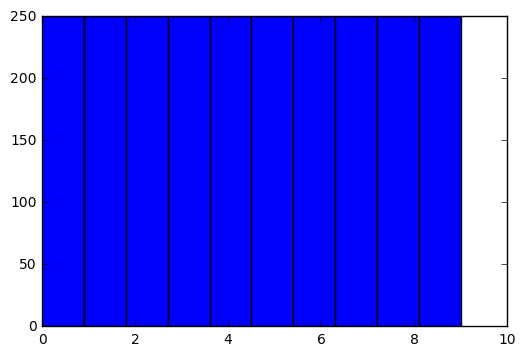

In [42]:
plt.hist(expected_labels)

In [45]:
our_predictions=np.argmax(probs,axis=1)

In [39]:
np.shape(our_predictions)

(2500,)

In [46]:
our_predictions[:100]

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 9, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [48]:
#Round our predictions to 0/1 to generate labels
#our_predictions = probs[:,0]
#our_labels = np.round(1-our_predictions)
our_labels=our_predictions

In [47]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 2209 correct labels


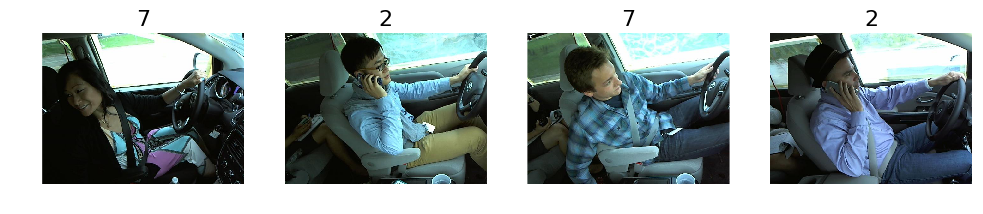

In [49]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 291 incorrect labels


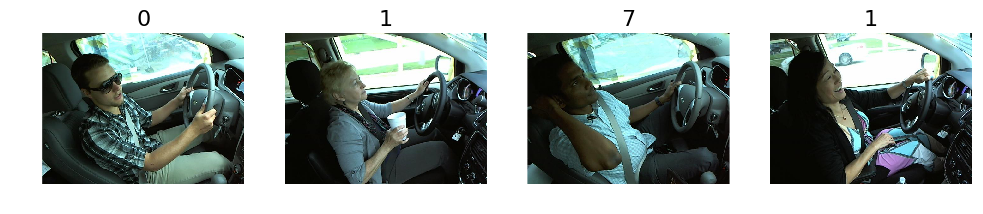

In [50]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

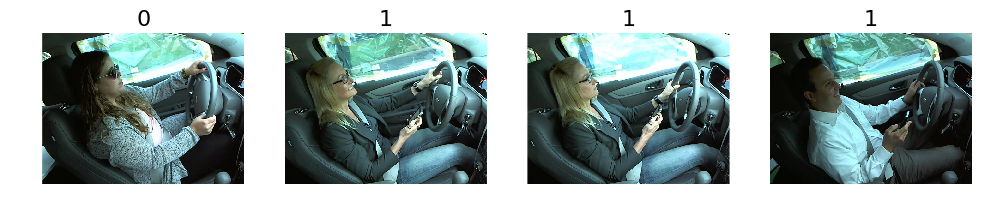

In [51]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

In [53]:
preds[:10,:]

array([[  5.5081e-02,   2.5780e-02,   6.1078e-05,   2.2742e-03,   8.4983e-03,   1.5807e-02,
          3.0244e-01,   2.7342e-02,   4.3974e-02,   5.1874e-01],
       [  1.7089e-01,   2.9516e-02,   3.0184e-05,   1.2120e-03,   3.6936e-03,   9.9874e-04,
          1.3919e-01,   4.4291e-02,   5.8824e-01,   2.1942e-02],
       [  2.0903e-04,   1.0753e-04,   1.0295e-02,   6.9669e-02,   8.4163e-01,   5.6179e-04,
          3.4931e-02,   4.2210e-06,   4.2158e-02,   4.3632e-04],
       [  6.0606e-05,   2.2968e-03,   2.8330e-02,   1.8075e-04,   8.0897e-03,   2.3402e-04,
          3.2746e-02,   2.3677e-03,   9.2080e-01,   4.8911e-03],
       [  1.7618e-02,   1.1031e-01,   1.8460e-03,   3.3935e-04,   4.2378e-02,   3.5729e-03,
          6.8141e-01,   4.7485e-03,   1.2199e-01,   1.5786e-02],
       [  1.3997e-04,   1.5124e-02,   4.3251e-04,   2.8123e-02,   9.7357e-03,   1.6037e-04,
          1.8048e-02,   9.0195e-01,   2.5936e-02,   3.5325e-04],
       [  1.4936e-01,   8.2529e-03,   3.4199e-03,   3.3306

In [54]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
preds_clipped = preds.clip(min=0.02, max=0.98)

In [56]:
preds_clipped[:4,:]

array([[ 0.0551,  0.0258,  0.02  ,  0.02  ,  0.02  ,  0.02  ,  0.3024,  0.0273,  0.044 ,  0.5187],
       [ 0.1709,  0.0295,  0.02  ,  0.02  ,  0.02  ,  0.02  ,  0.1392,  0.0443,  0.5882,  0.0219],
       [ 0.02  ,  0.02  ,  0.02  ,  0.0697,  0.8416,  0.02  ,  0.0349,  0.02  ,  0.0422,  0.02  ],
       [ 0.02  ,  0.02  ,  0.0283,  0.02  ,  0.02  ,  0.02  ,  0.0327,  0.02  ,  0.9208,  0.02  ]], dtype=float32)

In [64]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids=([f[f.find('/')+1:] for f in filenames])

In [75]:
filenames[:5]

['unknown/img_81601.jpg',
 'unknown/img_14887.jpg',
 'unknown/img_62885.jpg',
 'unknown/img_45125.jpg',
 'unknown/img_22633.jpg']

In [65]:
ids[:5]

['img_81601.jpg',
 'img_14887.jpg',
 'img_62885.jpg',
 'img_45125.jpg',
 'img_22633.jpg']

In [81]:
ids_array=np.array(ids)

In [83]:
np.shape(preds_clipped)

(79726, 10)

In [85]:
np.shape(ids_array[:,None])

(79726, 1)

In [86]:
subm = np.stack([ids_array[:,None],preds_clipped], axis=1)
subm[:5]

ValueError: all input arrays must have the same shape

In [88]:
subm=np.concatenate((ids_array[:,None],preds_clipped), axis=1)

In [89]:
np.shape(subm)

(79726, 11)

In [90]:
subm[:5,:]

array([['img_81601.jpg', '0.0550814382732', '0.0257804635912', '0.019999999553', '0.019999999553',
        '0.019999999553', '0.019999999553', '0.302437096834', '0.0273417681456', '0.043973788619',
        '0.518744766712'],
       ['img_14887.jpg', '0.170885041356', '0.0295157525688', '0.019999999553', '0.019999999553',
        '0.019999999553', '0.019999999553', '0.139192014933', '0.0442913062871', '0.588239550591',
        '0.0219418667257'],
       ['img_62885.jpg', '0.019999999553', '0.019999999553', '0.019999999553', '0.0696685388684',
        '0.841628551483', '0.019999999553', '0.0349308699369', '0.019999999553', '0.0421579070389',
        '0.019999999553'],
       ['img_45125.jpg', '0.019999999553', '0.019999999553', '0.0283295344561', '0.019999999553',
        '0.019999999553', '0.019999999553', '0.0327457673848', '0.019999999553', '0.920803964138',
        '0.019999999553'],
       ['img_22633.jpg', '0.019999999553', '0.110305987298', '0.019999999553', '0.019999999553',
    

In [106]:
%cd $DATA_HOME_DIR
submission_file_name = 'statefarm_submission.csv'
#np.savetxt(submission_file_name, subm, fmt='%s,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f', header='img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9', comments='')
import pandas as pd
df=pd.DataFrame(subm,columns='img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9'.split(','))
df.to_csv(submission_file_name,index=False)

/home/ubuntu/nbs/data/statefarm


In [98]:
np.shape(df)

(79726, 11)

In [99]:
df.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_81601.jpg,0.0550814382732,0.0257804635912,0.019999999553,0.019999999553,0.019999999553,0.019999999553,0.302437096834,0.0273417681456,0.043973788619,0.518744766712
1,img_14887.jpg,0.170885041356,0.0295157525688,0.019999999553,0.019999999553,0.019999999553,0.019999999553,0.139192014933,0.0442913062871,0.588239550591,0.0219418667257
2,img_62885.jpg,0.019999999553,0.019999999553,0.019999999553,0.0696685388684,0.841628551483,0.019999999553,0.0349308699369,0.019999999553,0.0421579070389,0.019999999553
3,img_45125.jpg,0.019999999553,0.019999999553,0.0283295344561,0.019999999553,0.019999999553,0.019999999553,0.0327457673848,0.019999999553,0.920803964138,0.019999999553
4,img_22633.jpg,0.019999999553,0.110305987298,0.019999999553,0.019999999553,0.0423780083656,0.019999999553,0.681410849094,0.019999999553,0.121994458139,0.019999999553


In [112]:
from IPython.display import FileLink
#%cd $DATA_HOME_DIR
%cd /home/ubuntu/fastai/deeplearning1/nbs/
df.to_csv(submission_file_name,index=False)
FileLink(submission_file_name)

/home/ubuntu/courses/deeplearning1/nbs


/home/ubuntu/courses/deeplearning1/nbs/statefarm_submission.csv

In [110]:
pwd

u'/home/ubuntu/courses/deeplearning1/nbs'

In [111]:
submission_file_name

'statefarm_submission.csv'

# Removing dropout

In [6]:
cd /home/ubuntu/fastai/deeplearning1/nbs/

/home/ubuntu/fastai/deeplearning1/nbs


In [2]:
import os, json, shutil
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
from utils import *
from vgg16 import Vgg16

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [7]:
DATA_HOME_DIR = '/home/ubuntu/data/statefarm'
path = DATA_HOME_DIR + '/' #'/sample/'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

In [8]:
%matplotlib inline

In [9]:
batch_size=64
vgg = Vgg16()

In [10]:
vgg.model.load_weights(path+'results/ft1.h5') 

In [11]:
layers = vgg.model.layers

In [12]:
last_conv_idx = [index for index,layer in enumerate(layers) 
                     if type(layer) is Convolution2D][-1]

In [21]:
last_conv_idx

30

In [13]:
conv_layers = layers[:last_conv_idx+1]
conv_model = Sequential(conv_layers)
# Dense layers - also known as fully connected or 'FC' layers
fc_layers = layers[last_conv_idx+1:]

In [11]:
?? vgg.get_batches

In [14]:
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', shuffle=False, batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', shuffle=False, batch_size=batch_size)
test_batches = vgg.get_batches(path+'test', shuffle=False, batch_size=batch_size)

val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

Found 18782 images belonging to 10 classes.
Found 3642 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [28]:
(np.shape(val_classes),np.shape(trn_classes),np.shape(val_labels),np.shape(trn_labels))

((3642,), (18782,), (3642, 10), (18782, 10))

In [16]:
val_labels[-5:-1,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [17]:
batches.class_indices

{'c0': 0,
 'c1': 1,
 'c2': 2,
 'c3': 3,
 'c4': 4,
 'c5': 5,
 'c6': 6,
 'c7': 7,
 'c8': 8,
 'c9': 9}

In [ ]:
#val_feat_pred=conv_model.predict()

In [29]:
#this takes a long long time (like 30min)!!
test_features = conv_model.predict_generator(test_batches, test_batches.nb_sample)

MemoryError: 

In [15]:
val_features = conv_model.predict_generator(val_batches, val_batches.nb_sample)

In [16]:
trn_features = conv_model.predict_generator(batches, batches.nb_sample)

In [ ]:
(np.shape(trn_features), np.shape(trn_labels), np.shape(val_features), np.shape(val_labels))

In [ ]:
save_array(path + 'test_convlayer_features.bc', test_features)

In [17]:
save_array(path + 'train_convlayer_features2.bc', trn_features)
save_array(path + 'valid_convlayer_features2.bc', val_features)

In [18]:
trn_features = load_array(path + 'train_convlayer_features2.bc')
val_features = load_array(path + 'valid_convlayer_features2.bc')
test_features = load_array(path + 'test_convlayer_features.bc')

In [21]:
def get_the_model():
    model = Sequential([
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    for layera in range(np.shape(fc_layers)[0]):
        model.layers[layera].set_weights(fc_layers[layera].get_weights())
    # Such a finely tuned model needs to be updated very slowly!
    opt = RMSprop(lr=0.00001, rho=0.7)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
#test_batches = gen.flow(X_test, Y_test, batch_size=50, shuffle=False)
##model.fit_generator(batches, batches.N, nb_epoch=1,validation_data=test_batches, nb_val_samples=test_batches.N)
#val_predicted = model.predict_generator(test_batches, test_batches.N)
#val_predicted2=model.predict(X_test, batch_size=50)
#np.array_equal(val_predicted,val_predicted2)
model=get_the_model()
gen = image.ImageDataGenerator()
val_batches = gen.flow(val_features, val_labels, batch_size=64, shuffle=False)
pretrain_valid_predgen=model.predict_generator(val_batches,val_batches.N)
pretrain_valid_pred=model.predict(val_features,batch_size=64)
np.array_equal(pretrain_valid_predgen,pretrain_valid_pred)

True

In [38]:
batches = gen.flow(trn_features, trn_labels, batch_size=64)
val_batches = gen.flow(val_features, val_labels, batch_size=64, shuffle=False)
model.fit_generator(batches, batches.N, nb_epoch=1,validation_data=test_batches, nb_val_samples=test_batches.N)

Epoch 1/1
19924/19924 [==============================] - 306s - loss: 0.2801 - acc: 0.9107 - val_loss: 0.0319 - val_acc: 0.9920


In [24]:
# OR... this is faster!!
model=get_the_model()
model.fit(trn_features, trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 18782 samples, validate on 3642 samples
Epoch 1/1
18782/18782 [==============================] - 29s - loss: 0.2668 - acc: 0.9157 - val_loss: 0.2822 - val_acc: 0.8968


In [23]:
model.fit(trn_features, trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 18782 samples, validate on 3642 samples
Epoch 1/1
18782/18782 [==============================] - 29s - loss: 0.0696 - acc: 0.9802 - val_loss: 0.3007 - val_acc: 0.8937


In [15]:
??vgg.get_batches

In [16]:
gen=image.ImageDataGenerator()
test_batches=gen.flow_from_directory(test_path, target_size=(224,224),
                class_mode='categorical', shuffle=False, batch_size=batch_size)
#batches, preds = model.test(test_path, batch_size = batch_size*2)
preds=model.predict(test_features,batch_size=64)


Found 79726 images belonging to 1 classes.


In [18]:
preds_clipped = preds.clip(min=0.02, max=0.98)
filenames = test_batches.filenames
ids=([f[f.find('/')+1:] for f in filenames])
ids_array=np.array(ids)
subm=np.concatenate((ids_array[:,None],preds_clipped), axis=1)
%cd $DATA_HOME_DIR
submission_file_name = 'statefarm_submission2.csv'
import pandas as pd
df=pd.DataFrame(subm,columns='img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9'.split(','))
df.to_csv(submission_file_name,index=False)
from IPython.display import FileLink
%cd /home/ubuntu/fastai/deeplearning1/nbs/
df.to_csv(submission_file_name,index=False)
FileLink(submission_file_name)

/home/ubuntu/data/statefarm
/home/ubuntu/fastai/deeplearning1/nbs


/home/ubuntu/fastai/deeplearning1/nbs/statefarm_submission2.csv

# pre-computing data augmentation ...

In [1]:
cd /home/ubuntu/fastai/deeplearning1/nbs/

/home/ubuntu/fastai/deeplearning1/nbs


In [2]:
import os, json, shutil
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
from utils import *
from vgg16 import Vgg16
import pandas as pd
import numpy as np

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
DATA_HOME_DIR = '/home/ubuntu/data/statefarm'
path = DATA_HOME_DIR + '/' #'/sample/'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

In [4]:
%matplotlib inline

In [5]:
batch_size=64

In [6]:
vgg = Vgg16()
vgg.model.load_weights(path+'results/ft1.h5') 
batches = vgg.get_batches(path+'train', shuffle=False, batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', shuffle=False, batch_size=batch_size)
test_batches = vgg.get_batches(path+'test', shuffle=False, batch_size=batch_size)

val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

Found 18782 images belonging to 10 classes.
Found 3642 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [7]:
layers = vgg.model.layers
last_conv_idx = [index for index,layer in enumerate(layers) 
                     if type(layer) is Convolution2D][-1]
conv_layers = layers[:last_conv_idx+3]
conv_model = Sequential(conv_layers)

In [8]:
conv_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
                                                                   lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
                                                                   zeropadding2d_1[1][0]            
___________________________________________________________________________________________

In [31]:
?? vgg.get_batches

In [11]:
#this takes a long long time (like 30min)!!
test_batches = vgg.get_batches(path+'test', shuffle=False, batch_size=batch_size)
test_features = conv_model.predict_generator(test_batches, test_batches.nb_sample)
save_array(path + 'test_convlayer_features.bc', test_features)
del test_features

In [12]:
val_batches = vgg.get_batches(path+'valid', shuffle=False, batch_size=batch_size)
val_features = conv_model.predict_generator(val_batches, val_batches.nb_sample)
save_array(path + 'valid_convlayer_features2.bc', val_features)

In [13]:
batches = vgg.get_batches(path+'train', shuffle=False, batch_size=batch_size)
trn_features = conv_model.predict_generator(batches, batches.nb_sample)
save_array(path + 'train_convlayer_features2.bc', trn_features)


In [ ]:
del val_features
del trn_features

In [9]:
# create 5x as many training samples as we currently have through data augmentation!

gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
da_batches = get_batches(path+'train', gen_t, batch_size=batch_size, shuffle=False)

da_conv_feat = conv_model.predict_generator(da_batches, da_batches.nb_sample*5)
save_array(path + 'train_da_convlayer_features.bc', da_conv_feat)

Found 18782 images belonging to 10 classes.


In [7]:
trn_features = load_array(path + 'train_convlayer_features2.bc')

In [35]:
val_features = load_array(path + 'valid_convlayer_features2.bc')

In [7]:
test_features = load_array(path + 'test_convlayer_features.bc')

In [9]:
da_conv_feat = load_array(path + 'train_da_convlayer_features.bc')

In [10]:
#combine the new da-images with the original training data
da_conv_feat = np.concatenate([da_conv_feat, trn_features])

In [11]:
#update the training labels wo they're 6x as long
da_trn_labels = np.concatenate([trn_labels]*6)

In [11]:
np.shape(da_trn_labels)

(112692, 10)

In [12]:
np.shape(trn_labels)

(18782, 10)

In [18]:
np.shape(da_conv_feat)[1]

25088

In [13]:
def get_the_model():
    model = Sequential([
        #MaxPooling2D(input_shape=np.shape(trn_features)[1:]),
        #Flatten(),
        BatchNormalization(input_shape=np.shape(trn_features)[1:]),
        Dropout(.8),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(0.8),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(0.8),
        Dense(10, activation='softmax')
        ])
    #for layera in range(np.shape(fc_layers)[0]):
    #    model.layers[layera].set_weights(fc_layers[layera].get_weights())
    # Such a finely tuned model needs to be updated very slowly!
    #opt = RMSprop(lr=0.00001, rho=0.7)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
#import gc
#gc.collect()
del test_features

In [14]:
model=get_the_model()

In [15]:

model.fit(da_conv_feat, da_trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 112692 samples, validate on 3642 samples
Epoch 1/1
112692/112692 [==============================] - 215s - loss: 1.0179 - acc: 0.7890 - val_loss: 1.6205 - val_acc: 0.7232


In [16]:
model.optimizer.lr=0.001

In [17]:
model.fit(da_conv_feat, da_trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 112692 samples, validate on 3642 samples
Epoch 1/1
112692/112692 [==============================] - 215s - loss: 0.5157 - acc: 0.8908 - val_loss: 1.3103 - val_acc: 0.7748


In [18]:
model.save_weights(path+'results/da1.h5')

In [19]:
model.fit(da_conv_feat, da_trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 112692 samples, validate on 3642 samples
Epoch 1/1
112692/112692 [==============================] - 215s - loss: 0.4528 - acc: 0.9085 - val_loss: 1.3273 - val_acc: 0.7935


In [20]:
model.save_weights(path+'results/da2.h5')

In [22]:
model.optimizer.lr=0.005

In [23]:
model.fit(da_conv_feat, da_trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 112692 samples, validate on 3642 samples
Epoch 1/1
112692/112692 [==============================] - 215s - loss: 0.3960 - acc: 0.9209 - val_loss: 1.5702 - val_acc: 0.7694


In [24]:
model.save_weights(path+'results/da3.h5')

In [25]:
model.optimizer.lr=0.01
model.fit(da_conv_feat, da_trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))
model.save_weights(path+'results/da4.h5')

Train on 112692 samples, validate on 3642 samples
Epoch 1/1
112692/112692 [==============================] - 215s - loss: 0.3534 - acc: 0.9282 - val_loss: 1.4517 - val_acc: 0.7814


In [26]:
model.load_weights(path+'results/da1.h5')

In [27]:
gen=image.ImageDataGenerator()
test_batches=gen.flow_from_directory(test_path, target_size=(224,224),
                class_mode='categorical', shuffle=False, batch_size=batch_size)
test_features = load_array('/home/ubuntu/data/statefarm/test_convlayer_features.bc')
preds=model.predict(test_features,batch_size=64)

Found 79726 images belonging to 1 classes.


In [28]:
preds_clipped = preds.clip(min=0.02, max=0.98)
filenames = test_batches.filenames
ids=([f[f.find('/')+1:] for f in filenames])
ids_array=np.array(ids)
subm=np.concatenate((ids_array[:,None],preds_clipped), axis=1)
%cd $DATA_HOME_DIR
submission_file_name = 'statefarm_submission3.csv'
import pandas as pd
df=pd.DataFrame(subm,columns='img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9'.split(','))
df.to_csv(submission_file_name,index=False)
from IPython.display import FileLink
%cd /home/ubuntu/fastai/deeplearning1/nbs/
df.to_csv(submission_file_name,index=False)
FileLink(submission_file_name)

/home/ubuntu/data/statefarm
/home/ubuntu/fastai/deeplearning1/nbs


/home/ubuntu/fastai/deeplearning1/nbs/statefarm_submission3.csv

# ... and pseudolabeling

In [31]:
del test_features

In [29]:
# we first need to get our model's final predictions for the validation data
val_pseudo = model.predict(val_features, batch_size=batch_size)

In [30]:
# then, combine these predictions with our actual training labels
comb_pseudo = np.concatenate([da_trn_labels, val_pseudo])

In [32]:
#then, combine the input features of the validation data with our training input features
comb_feat = np.concatenate([da_conv_feat, val_features])

In [33]:
del trn_features

In [36]:
model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=1, 
             validation_data=(val_features, val_labels))

Train on 116334 samples, validate on 3642 samples
Epoch 1/1
116334/116334 [==============================] - 220s - loss: 0.6765 - acc: 0.8861 - val_loss: 2.4945 - val_acc: 0.7499


In [37]:
model.save_weights(path+'results/pseudo1.h5')

In [38]:
model.optimizer.lr=0.005

In [39]:
model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=1, 
             validation_data=(val_features, val_labels))

Train on 116334 samples, validate on 3642 samples
Epoch 1/1
116334/116334 [==============================] - 222s - loss: 0.4784 - acc: 0.9132 - val_loss: 2.1935 - val_acc: 0.7784


In [40]:
model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=1, 
             validation_data=(val_features, val_labels))

Train on 116334 samples, validate on 3642 samples
Epoch 1/1
116334/116334 [==============================] - 221s - loss: 0.3826 - acc: 0.9259 - val_loss: 1.8353 - val_acc: 0.8040


In [42]:
model.save_weights(path+'results/pseudo2.h5')

In [41]:
from theano.sandbox import cuda
cuda.use('gpu0')

In [43]:
model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=1, 
             validation_data=(val_features, val_labels))

Train on 116334 samples, validate on 3642 samples
Epoch 1/1
116334/116334 [==============================] - 221s - loss: 0.3221 - acc: 0.9329 - val_loss: 1.7320 - val_acc: 0.8026
